# Pre-Processing

In [1]:
# Importing the libraries

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# reading the data

In [4]:
data = pd.read_csv(r'C:\Users\admin\OneDrive\Desktop\Machine Learning\credit_score.csv')
data

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,0x1603,CUS0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,0x1605,CUS0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,0x1606,CUS0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,0x25fea,CUS0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,0x25feb,CUS0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [3]:
# descriptive statistics

In [5]:
data.describe(include='all')

,ID,CustomerID,Month,Name,Age,SSN,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495,87495,78779,87495.000000,87495,81317,8.749500e+04,74319.000000,87495.000000,...,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,87495,12500,8,10139,NaN,12501,15,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,0x1602,CUS0xd40,January,Langep,NaN,#F%$D@*&8,Lawyer,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,1,8,10970,41,NaN,4857,5762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,NaN,NaN,NaN,110.467364,NaN,NaN,1.802404e+05,4193.181285,17.112646,...,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,NaN,NaN,NaN,686.549658,NaN,NaN,1.455212e+06,3179.195651,117.428586,...,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,NaN,NaN,NaN,-500.000000,NaN,NaN,7.005930e+03,303.645417,-1.000000,...,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,1.943348e+04,1626.677917,3.000000,...,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,3.757975e+04,3095.905000,6.000000,...,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,7.288608e+04,5967.930000,7.000000,...,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [4]:
# Dropping unnecessary columns 

In [6]:
data = data.drop(data[['ID','CustomerID','Name','SSN']],axis=1)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,TypeofLoan,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,"Auto Loan, and Student Loan",...,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,"Auto Loan, and Student Loan",...,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [7]:
data = data.drop(data[['TypeofLoan']],axis=1)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,...,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,...,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,...,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,...,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,...,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor


In [8]:
pd.set_option('display.max_columns',30)
data.describe(include='all')

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore
count,87495,87495.000000,81317,8.749500e+04,74319.000000,87495.000000,87495.000000,87495.000000,87495.000000,87495.000000,81400.000000,85654.000000,85789.000000,87495.000000,87495.000000,87495,87495.000000,79786.000000,87495,86437.000000,87495
unique,8,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,LowspentSmallvaluepayments,NaN,Standard
freq,10970,NaN,5762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45810,NaN,NaN,22237,NaN,46651
mean,NaN,110.467364,NaN,1.802404e+05,4193.181285,17.112646,22.664792,73.050871,7.019841,21.060403,30.904324,10.385851,27.734302,1426.716635,32.290526,NaN,1388.517947,195.482486,NaN,402.281023,NaN
std,NaN,686.549658,NaN,1.455212e+06,3179.195651,117.428586,129.806747,467.727237,60.352339,14.864558,225.495250,6.776714,193.011903,1155.824064,5.112418,NaN,8248.832131,199.357752,NaN,213.309331,NaN
min,NaN,-500.000000,NaN,7.005930e+03,303.645417,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,24.000000,NaN,1.943348e+04,1626.677917,3.000000,4.000000,8.000000,1.000000,10.000000,9.000000,5.340000,3.000000,566.400000,28.059063,NaN,30.453014,72.220853,NaN,270.107156,NaN
50%,NaN,33.000000,NaN,3.757975e+04,3095.905000,6.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.410000,6.000000,1166.230000,32.322206,NaN,69.285581,128.921405,NaN,336.698600,NaN
75%,NaN,42.000000,NaN,7.288608e+04,5967.930000,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.840000,9.000000,1948.980000,36.495606,NaN,161.405543,236.802042,NaN,470.180816,NaN


In [9]:
data.columns

Index(['Month', 'Age', 'Occupation', 'AnnualIncome', 'MonthlyInhandSalary',
       'NumBankAccounts', 'NumCreditCard', 'InterestRate', 'NumofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore'],
      dtype='object')

In [5]:
# Creating dependent variable 

# There are 3 values in the credit score column: good, poor, and standard. 
# A new column called "score" is created, and if the values in the "credit_score" column are not poor, 0 is written, otherwise 1 is written.
# The newly created "score" column becomes the dependent variable and has 2 values, 0 and 1.

In [10]:
data['score']= np.where((data.CreditScore == 'Poor'),1,0)
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.0,9.50,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.0,11.50,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.0,11.50,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.0,11.50,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [6]:
# we can check the count of each value using the value_counts() function.

In [11]:
data.score.value_counts()

0    62145
1    25350
Name: score, dtype: int64

In [ ]:
# We check for missing values in the data and if there are any, we replace them (using mean or mode).



In [12]:
data.isnull().sum()

Month                         0
Age                           0
Occupation                 6178
AnnualIncome                  0
MonthlyInhandSalary       13176
NumBankAccounts               0
NumCreditCard                 0
InterestRate                  0
NumofLoan                     0
Delayfromduedate              0
NumofDelayedPayment        6095
ChangedCreditLimit         1841
NumCreditInquiries         1706
OutstandingDebt               0
CreditUtilizationRatio        0
PaymentofMinAmount            0
TotalEMIpermonth              0
Amountinvestedmonthly      7709
PaymentBehaviour              0
MonthlyBalance             1058
CreditScore                   0
score                         0
dtype: int64

In [13]:
for i in data [['MonthlyInhandSalary','NumofDelayedPayment','ChangedCreditLimit','NumCreditInquiries','Amountinvestedmonthly','MonthlyBalance']]:
               data[i] = data[i].fillna(value=data[i].mean())


In [14]:
for i in data[['Occupation']]:
    data[i] = data[i].fillna(value=data[i].mode()[0])
    

In [15]:
data

,Month,Age,Occupation,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,PaymentofMinAmount,TotalEMIpermonth,Amountinvestedmonthly,PaymentBehaviour,MonthlyBalance,CreditScore,score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7.000000,11.270000,4.0,809.98,26.822620,No,49.574949,80.415295,HighspentSmallvaluepayments,312.494089,Good,0
1,February,23,Scientist,19114.12,4193.181285,3,4,3,4,-1,30.904324,11.270000,4.0,809.98,31.944960,No,49.574949,118.280222,LowspentLargevaluepayments,284.629163,Good,0
2,March,-500,Scientist,19114.12,4193.181285,3,4,3,4,3,7.000000,10.385851,4.0,809.98,28.609352,No,49.574949,81.699521,LowspentMediumvaluepayments,331.209863,Good,0
3,April,23,Scientist,19114.12,4193.181285,3,4,3,4,5,4.000000,6.270000,4.0,809.98,31.377862,No,49.574949,199.458074,LowspentSmallvaluepayments,223.451310,Good,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,30.904324,11.270000,4.0,809.98,24.797347,No,49.574949,41.420153,HighspentMediumvaluepayments,341.489231,Good,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,March,25,Mechanic,39628.99,3359.415833,4,6,7,2,20,6.000000,9.500000,3.0,502.38,39.323569,No,35.104023,140.581403,HighspentMediumvaluepayments,410.256158,Poor,1
87491,April,25,Mechanic,39628.99,3359.415833,4,6,7,2,23,7.000000,11.500000,3.0,502.38,34.663572,No,35.104023,60.971333,HighspentLargevaluepayments,479.866228,Poor,1
87492,May,25,Mechanic,39628.99,3359.415833,4,6,7,2,18,7.000000,11.500000,3.0,502.38,40.565631,No,35.104023,54.185950,HighspentMediumvaluepayments,496.651610,Poor,1
87493,June,25,Mechanic,39628.99,3359.415833,4,6,5729,2,27,6.000000,11.500000,3.0,502.38,41.255522,No,35.104023,24.028477,HighspentLargevaluepayments,516.809083,Poor,1


In [16]:
data.isnull().sum()

Month                     0
Age                       0
Occupation                0
AnnualIncome              0
MonthlyInhandSalary       0
NumBankAccounts           0
NumCreditCard             0
InterestRate              0
NumofLoan                 0
Delayfromduedate          0
NumofDelayedPayment       0
ChangedCreditLimit        0
NumCreditInquiries        0
OutstandingDebt           0
CreditUtilizationRatio    0
PaymentofMinAmount        0
TotalEMIpermonth          0
Amountinvestedmonthly     0
PaymentBehaviour          0
MonthlyBalance            0
CreditScore               0
score                     0
dtype: int64

In [9]:
# We examine the correlation, and keep the variables that are above 1 percent.

In [17]:
data.corr()

,Age,AnnualIncome,MonthlyInhandSalary,NumBankAccounts,NumCreditCard,InterestRate,NumofLoan,Delayfromduedate,NumofDelayedPayment,ChangedCreditLimit,NumCreditInquiries,OutstandingDebt,CreditUtilizationRatio,TotalEMIpermonth,Amountinvestedmonthly,MonthlyBalance,score
Age,1.000000,0.000313,0.003428,0.004221,-0.002128,-0.006498,-0.000678,-0.010681,-0.001586,-0.002260,-0.002742,-0.002770,0.003097,0.001550,-0.002886,0.007571,-0.004274
AnnualIncome,0.000313,1.000000,0.027481,-0.005177,0.002273,-0.002117,0.000598,-0.010983,-0.000647,0.000536,0.002259,-0.001386,0.009766,-0.002405,0.017647,0.020423,-0.009860
MonthlyInhandSalary,0.003428,0.027481,1.000000,-0.010029,-0.004492,-0.004234,-0.010131,-0.230261,-0.000296,-0.158334,-0.006821,-0.248052,0.157102,0.005408,0.549497,0.639291,-0.150101
NumBankAccounts,0.004221,-0.005177,-0.010029,1.000000,-0.002291,-0.003972,-0.000191,0.015375,-0.002950,0.006981,-0.001104,0.014379,0.000093,-0.000863,-0.004932,-0.008569,0.008252
NumCreditCard,-0.002128,0.002273,-0.004492,-0.002291,1.000000,-0.004265,0.000705,0.009764,0.005598,0.005787,-0.003132,0.006703,-0.001410,0.000752,-0.001350,-0.007301,0.007890
InterestRate,-0.006498,-0.002117,-0.004234,-0.003972,-0.004265,1.000000,0.001854,0.009996,0.004090,0.000059,-0.001274,0.009704,-0.000157,-0.001180,-0.001001,-0.007962,0.005670
NumofLoan,-0.000678,0.000598,-0.010131,-0.000191,0.000705,0.001854,1.000000,0.013155,0.010637,0.014214,-0.000153,0.024058,-0.004647,0.001606,-0.006653,-0.019431,0.007689
Delayfromduedate,-0.010681,-0.010983,-0.230261,0.015375,0.009764,0.009996,0.013155,1.000000,0.012771,0.289553,0.009700,0.572413,-0.063065,-0.002351,-0.154059,-0.275944,0.372259
NumofDelayedPayment,-0.001586,-0.000647,-0.000296,-0.002950,0.005598,0.004090,0.010637,0.012771,1.000000,0.006684,0.003610,0.011872,-0.001065,-0.000139,0.000912,-0.005413,0.002691
ChangedCreditLimit,-0.002260,0.000536,-0.158334,0.006981,0.005787,0.000059,0.014214,0.289553,0.006684,1.000000,0.006136,0.451772,-0.047968,-0.001833,-0.107700,-0.198200,0.063423


<AxesSubplot:>

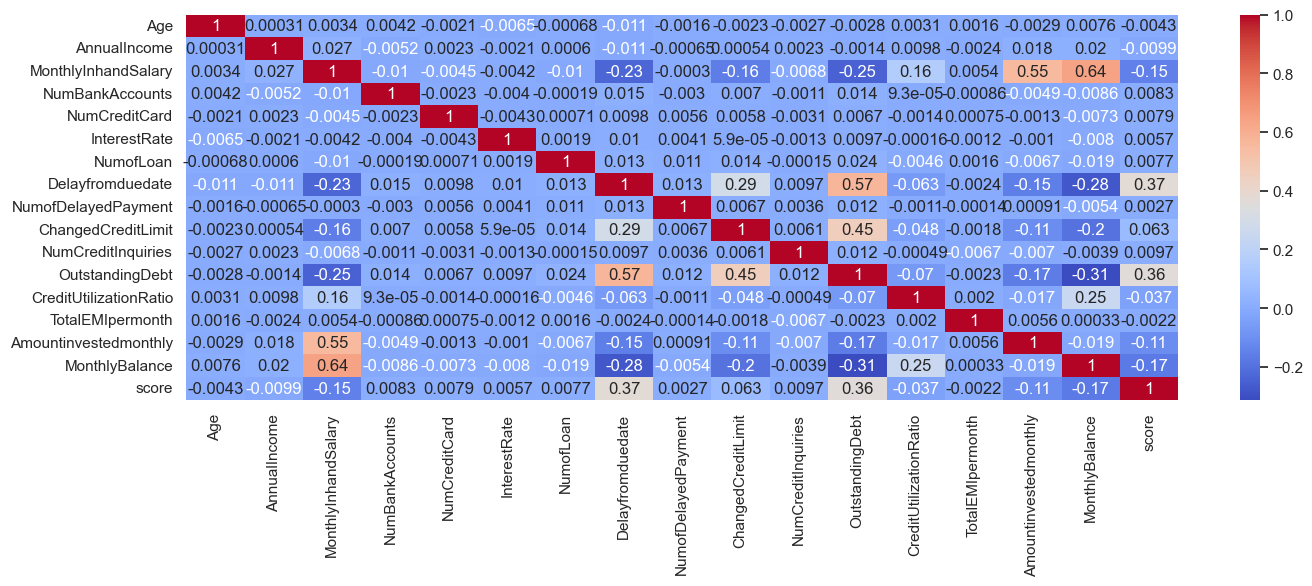

In [18]:
plt.figure(figsize = (16,5))

sns.heatmap(data.corr(),cmap='coolwarm',annot=True)

In [19]:
data.columns

Index(['Month', 'Age', 'Occupation', 'AnnualIncome', 'MonthlyInhandSalary',
       'NumBankAccounts', 'NumCreditCard', 'InterestRate', 'NumofLoan',
       'Delayfromduedate', 'NumofDelayedPayment', 'ChangedCreditLimit',
       'NumCreditInquiries', 'OutstandingDebt', 'CreditUtilizationRatio',
       'PaymentofMinAmount', 'TotalEMIpermonth', 'Amountinvestedmonthly',
       'PaymentBehaviour', 'MonthlyBalance', 'CreditScore', 'score'],
      dtype='object')

In [20]:
new_data=data[['MonthlyInhandSalary','Delayfromduedate','ChangedCreditLimit','OutstandingDebt','CreditUtilizationRatio','Amountinvestedmonthly','MonthlyBalance','Occupation','Month','PaymentofMinAmount','PaymentBehaviour','score']]
new_data

,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,1824.843333,3,11.270000,809.98,26.822620,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,4193.181285,-1,11.270000,809.98,31.944960,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,4193.181285,3,10.385851,809.98,28.609352,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,4193.181285,5,6.270000,809.98,31.377862,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,1824.843333,6,11.270000,809.98,24.797347,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87490,3359.415833,20,9.500000,502.38,39.323569,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,3359.415833,23,11.500000,502.38,34.663572,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,3359.415833,18,11.500000,502.38,40.565631,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,3359.415833,27,11.500000,502.38,41.255522,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


In [10]:
# After filtering out the variables based on correlation, we check for collinearity among the remaining independent numerical variables using VIF (Variance Inflation Factor).

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
variables = new_data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,4.050698,Delayfromduedate
1,3.772889,ChangedCreditLimit
2,4.342809,OutstandingDebt
3,1.749134,Amountinvestedmonthly
4,2.389092,MonthlyBalance


In [23]:
new_data

,MonthlyInhandSalary,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,CreditUtilizationRatio,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,1824.843333,3,11.270000,809.98,26.822620,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,4193.181285,-1,11.270000,809.98,31.944960,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,4193.181285,3,10.385851,809.98,28.609352,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,4193.181285,5,6.270000,809.98,31.377862,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,1824.843333,6,11.270000,809.98,24.797347,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...,...,...
87490,3359.415833,20,9.500000,502.38,39.323569,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,3359.415833,23,11.500000,502.38,34.663572,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,3359.415833,18,11.500000,502.38,40.565631,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,3359.415833,27,11.500000,502.38,41.255522,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


In [24]:
# outlier treatment 

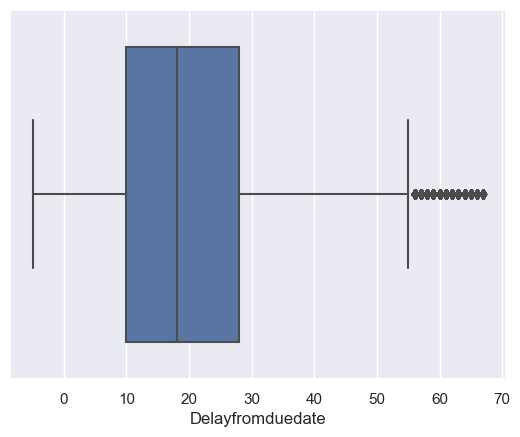

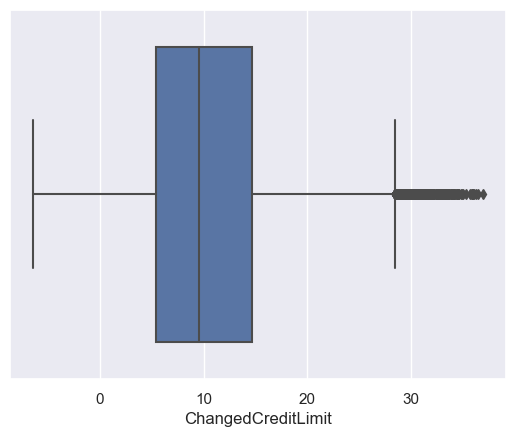

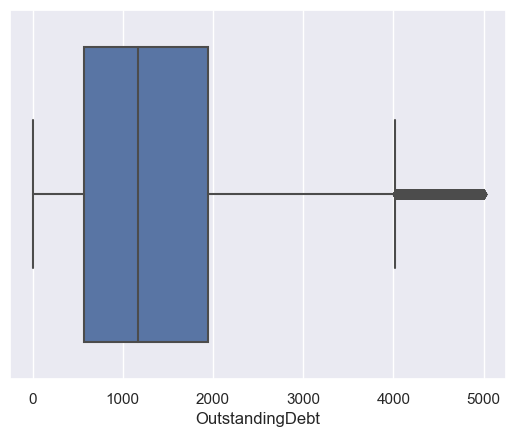

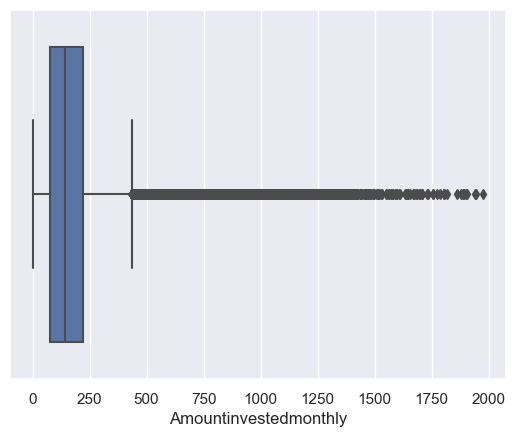

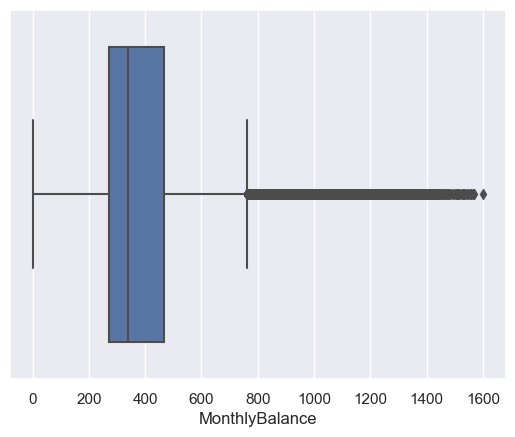

In [25]:
for i in new_data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=new_data,x=new_data[i])
    plt.show()

In [26]:
q1=new_data.quantile(0.25)
q3=new_data.quantile(0.75)
IQR=q3-q1

Lower = q1-1.5*IQR
Upper = q3+1.5*IQR

In [27]:
for i in new_data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    new_data[i] = np.where(new_data[i] > Upper[i],
                           Upper[i],new_data[i])

C:\Users\admin\AppData\Local\Temp\ipykernel_7216\3592633208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[i] = np.where(new_data[i] > Upper[i],


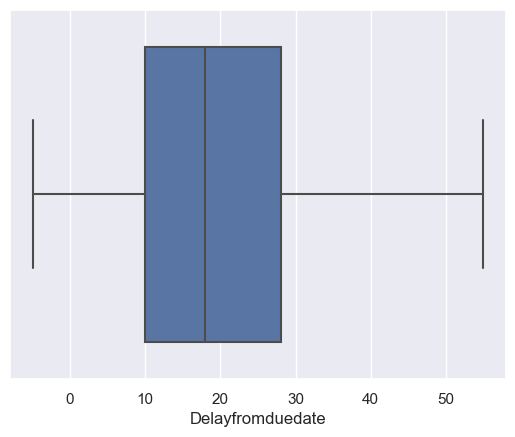

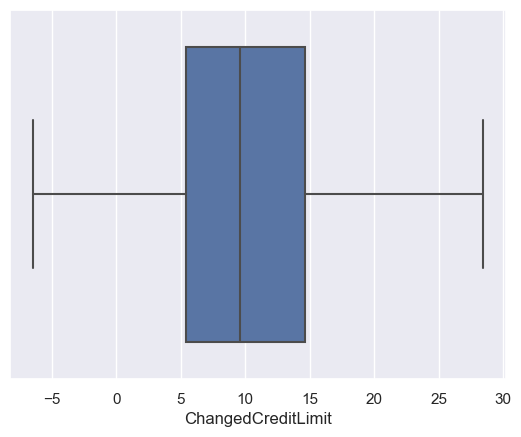

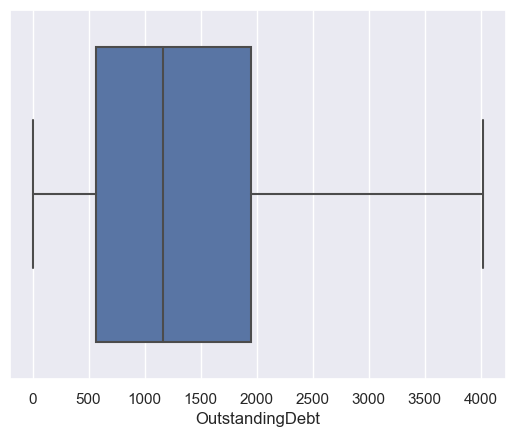

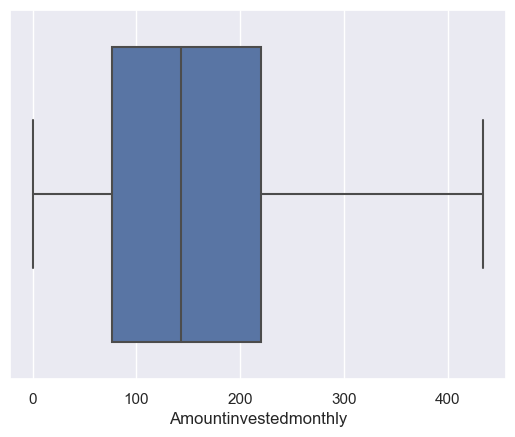

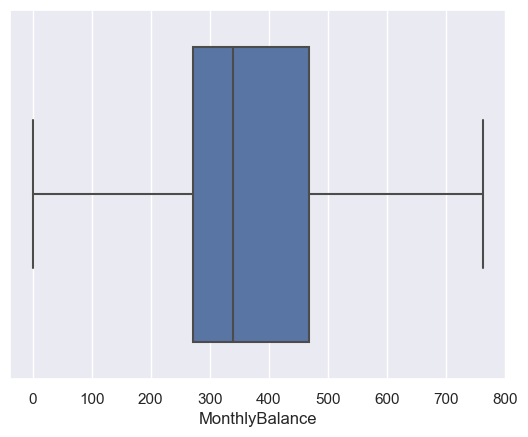

In [28]:
for i in new_data[['Delayfromduedate','ChangedCreditLimit','OutstandingDebt','Amountinvestedmonthly','MonthlyBalance']]:
    sns.boxplot(data=new_data,x=new_data[i])
    plt.show()

In [29]:
# We retain the remaining variables from the above steps and incorporate them into a new dataset or retain them within the same dataset.

In [30]:
new_data = new_data.drop(new_data[['MonthlyInhandSalary','CreditUtilizationRatio']],axis=1)

In [31]:
new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0
...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1


In [32]:
# WoE (Weight of Evidence) transformation is performed for each of the remaining numerical and categorical variables.

In [33]:
ranges = [-np.inf, new_data['Delayfromduedate'].quantile(0.25), new_data['Delayfromduedate'].quantile(0.5),new_data['Delayfromduedate'].quantile(0.75), np.inf]
new_data['category'] = pd.cut(new_data['Delayfromduedate'], bins=ranges)
    
grouped = new_data.groupby(['category', 'score'])['score'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

grouped.rename(columns={'woe':'Delayfromduedate_woe'}, inplace=True)
new_data = new_data.merge(grouped[['category','Delayfromduedate_woe']], how='left', on='category')
new_data.drop('category', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,1.050763
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,1.050763
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,1.050763
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,1.050763
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,1.050763
...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,-0.100916
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,-0.100916
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,0.496847
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,-0.100916


In [34]:
ranges = [-np.inf, new_data['ChangedCreditLimit'].quantile(0.25), new_data['ChangedCreditLimit'].quantile(0.5),new_data['ChangedCreditLimit'].quantile(0.75), np.inf]
new_data['category'] = pd.cut(new_data['ChangedCreditLimit'], bins=ranges)
    
grouped = new_data.groupby(['category', 'score'])['score'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

grouped.rename(columns={'woe':'ChangedCreditLimit_woe'}, inplace=True)
new_data = new_data.merge(grouped[['category','ChangedCreditLimit_woe']], how='left', on='category')
new_data.drop('category', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,1.050763,0.131787
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,1.050763,0.131787
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,1.050763,0.131787
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,1.050763,0.039621
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,1.050763,0.131787
...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,-0.100916,0.039621
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,-0.100916,0.131787
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,0.496847,0.131787
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,-0.100916,0.131787


In [35]:
ranges = [-np.inf, new_data['OutstandingDebt'].quantile(0.25), new_data['OutstandingDebt'].quantile(0.5),new_data['OutstandingDebt'].quantile(0.75), np.inf]
new_data['category'] = pd.cut(new_data['OutstandingDebt'], bins=ranges)
    
grouped = new_data.groupby(['category', 'score'])['score'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

grouped.rename(columns={'woe':'OutstandingDebt_woe'}, inplace=True)
new_data = new_data.merge(grouped[['category','OutstandingDebt_woe']], how='left', on='category')
new_data.drop('category', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,1.050763,0.131787,1.209568
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,1.050763,0.131787,1.209568
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,1.050763,0.131787,1.209568
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,1.050763,0.039621,1.209568
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,1.050763,0.131787,1.209568
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,-0.100916,0.039621,1.271917
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,0.496847,0.131787,1.271917
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917


In [36]:
ranges = [-np.inf, new_data['Amountinvestedmonthly'].quantile(0.25), new_data['Amountinvestedmonthly'].quantile(0.5),new_data['Amountinvestedmonthly'].quantile(0.75), np.inf]
new_data['category'] = pd.cut(new_data['Amountinvestedmonthly'], bins=ranges)
    
grouped = new_data.groupby(['category', 'score'])['score'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

grouped.rename(columns={'woe':'Amountinvestedmonthly_woe'}, inplace=True)
new_data = new_data.merge(grouped[['category','Amountinvestedmonthly_woe']], how='left', on='category')
new_data.drop('category', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,1.050763,0.131787,1.209568,-0.124014
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,1.050763,0.131787,1.209568,-0.124014
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.124014
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,1.050763,0.039621,1.209568,0.015442
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.200594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,-0.100916,0.039621,1.271917,-0.124014
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,0.496847,0.131787,1.271917,-0.200594
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594


In [37]:
ranges = [-np.inf, new_data['MonthlyBalance'].quantile(0.25), new_data['MonthlyBalance'].quantile(0.5),new_data['MonthlyBalance'].quantile(0.75), np.inf]
new_data['category'] = pd.cut(new_data['MonthlyBalance'], bins=ranges)
    
grouped = new_data.groupby(['category', 'score'])['score'].count().unstack().reset_index()


grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])

grouped.rename(columns={'woe':'MonthlyBalance_woe'}, inplace=True)
new_data = new_data.merge(grouped[['category','MonthlyBalance_woe']], how='left', on='category')
new_data.drop('category', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Occupation,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe
0,3.0,11.270000,809.98,80.415295,312.494089,Scientist,January,No,HighspentSmallvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030
1,-1.0,11.270000,809.98,118.280222,284.629163,Scientist,February,No,LowspentLargevaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030
2,3.0,10.385851,809.98,81.699521,331.209863,Scientist,March,No,LowspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030
3,5.0,6.270000,809.98,199.458074,223.451310,Scientist,April,No,LowspentSmallvaluepayments,0,1.050763,0.039621,1.209568,0.015442,-0.489969
4,6.0,11.270000,809.98,41.420153,341.489231,Scientist,May,No,HighspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.200594,0.214456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,Mechanic,March,No,HighspentMediumvaluepayments,1,-0.100916,0.039621,1.271917,-0.124014,0.214456
87491,23.0,11.500000,502.38,60.971333,479.866228,Mechanic,April,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625
87492,18.0,11.500000,502.38,54.185950,496.651610,Mechanic,May,No,HighspentMediumvaluepayments,1,0.496847,0.131787,1.271917,-0.200594,0.683625
87493,27.0,11.500000,502.38,24.028477,516.809083,Mechanic,June,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625


In [38]:
grouped = new_data.groupby(['Occupation', 'score'])['score'].count().unstack().reset_index()

grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped.rename(columns={'woe':'Occupation_woe'}, inplace=True)
new_data = new_data.merge(grouped[['Occupation','Occupation_woe']], how='left', on='Occupation')
new_data.drop('Occupation', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,Month,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe
0,3.0,11.270000,809.98,80.415295,312.494089,January,No,HighspentSmallvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783
1,-1.0,11.270000,809.98,118.280222,284.629163,February,No,LowspentLargevaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783
2,3.0,10.385851,809.98,81.699521,331.209863,March,No,LowspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783
3,5.0,6.270000,809.98,199.458074,223.451310,April,No,LowspentSmallvaluepayments,0,1.050763,0.039621,1.209568,0.015442,-0.489969,-0.080783
4,6.0,11.270000,809.98,41.420153,341.489231,May,No,HighspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.200594,0.214456,-0.080783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,March,No,HighspentMediumvaluepayments,1,-0.100916,0.039621,1.271917,-0.124014,0.214456,-0.053353
87491,23.0,11.500000,502.38,60.971333,479.866228,April,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353
87492,18.0,11.500000,502.38,54.185950,496.651610,May,No,HighspentMediumvaluepayments,1,0.496847,0.131787,1.271917,-0.200594,0.683625,-0.053353
87493,27.0,11.500000,502.38,24.028477,516.809083,June,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353


In [39]:
grouped = new_data.groupby(['Month', 'score'])['score'].count().unstack().reset_index()

grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped.rename(columns={'woe':'Month_woe'}, inplace=True)
new_data = new_data.merge(grouped[['Month','Month_woe']], how='left', on='Month')
new_data.drop('Month', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,PaymentofMinAmount,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe
0,3.0,11.270000,809.98,80.415295,312.494089,No,HighspentSmallvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.013036
1,-1.0,11.270000,809.98,118.280222,284.629163,No,LowspentLargevaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.031453
2,3.0,10.385851,809.98,81.699521,331.209863,No,LowspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.021323
3,5.0,6.270000,809.98,199.458074,223.451310,No,LowspentSmallvaluepayments,0,1.050763,0.039621,1.209568,0.015442,-0.489969,-0.080783,-0.017560
4,6.0,11.270000,809.98,41.420153,341.489231,No,HighspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.200594,0.214456,-0.080783,-0.019930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,No,HighspentMediumvaluepayments,1,-0.100916,0.039621,1.271917,-0.124014,0.214456,-0.053353,0.021323
87491,23.0,11.500000,502.38,60.971333,479.866228,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.017560
87492,18.0,11.500000,502.38,54.185950,496.651610,No,HighspentMediumvaluepayments,1,0.496847,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.019930
87493,27.0,11.500000,502.38,24.028477,516.809083,No,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.030392


In [40]:
grouped = new_data.groupby(['PaymentofMinAmount', 'score'])['score'].count().unstack().reset_index()

grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped.rename(columns={'woe':'PaymentofMinAmount_woe'}, inplace=True)
new_data = new_data.merge(grouped[['PaymentofMinAmount','PaymentofMinAmount_woe']], how='left', on='PaymentofMinAmount')
new_data.drop('PaymentofMinAmount', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,PaymentBehaviour,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe
0,3.0,11.270000,809.98,80.415295,312.494089,HighspentSmallvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.013036,0.97376
1,-1.0,11.270000,809.98,118.280222,284.629163,LowspentLargevaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.031453,0.97376
2,3.0,10.385851,809.98,81.699521,331.209863,LowspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.021323,0.97376
3,5.0,6.270000,809.98,199.458074,223.451310,LowspentSmallvaluepayments,0,1.050763,0.039621,1.209568,0.015442,-0.489969,-0.080783,-0.017560,0.97376
4,6.0,11.270000,809.98,41.420153,341.489231,HighspentMediumvaluepayments,0,1.050763,0.131787,1.209568,-0.200594,0.214456,-0.080783,-0.019930,0.97376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,HighspentMediumvaluepayments,1,-0.100916,0.039621,1.271917,-0.124014,0.214456,-0.053353,0.021323,0.97376
87491,23.0,11.500000,502.38,60.971333,479.866228,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.017560,0.97376
87492,18.0,11.500000,502.38,54.185950,496.651610,HighspentMediumvaluepayments,1,0.496847,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.019930,0.97376
87493,27.0,11.500000,502.38,24.028477,516.809083,HighspentLargevaluepayments,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.030392,0.97376


In [41]:
grouped = new_data.groupby(['PaymentBehaviour', 'score'])['score'].count().unstack().reset_index()

grouped['positive_prop'] = grouped[0] / grouped[0].sum()
grouped['negative_prop'] = grouped[1] / grouped[1].sum()
    
grouped['woe'] = np.log(grouped['positive_prop'] / grouped['negative_prop'])
    
grouped.rename(columns={'woe':'PaymentBehaviour_woe'}, inplace=True)
new_data = new_data.merge(grouped[['PaymentBehaviour','PaymentBehaviour_woe']], how='left', on='PaymentBehaviour')
new_data.drop('PaymentBehaviour', axis=1, inplace=True)

new_data

,Delayfromduedate,ChangedCreditLimit,OutstandingDebt,Amountinvestedmonthly,MonthlyBalance,score,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,3.0,11.270000,809.98,80.415295,312.494089,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.013036,0.97376,0.087011
1,-1.0,11.270000,809.98,118.280222,284.629163,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.031453,0.97376,0.057730
2,3.0,10.385851,809.98,81.699521,331.209863,0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.021323,0.97376,-0.070569
3,5.0,6.270000,809.98,199.458074,223.451310,0,1.050763,0.039621,1.209568,0.015442,-0.489969,-0.080783,-0.017560,0.97376,-0.315796
4,6.0,11.270000,809.98,41.420153,341.489231,0,1.050763,0.131787,1.209568,-0.200594,0.214456,-0.080783,-0.019930,0.97376,0.182672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87490,20.0,9.500000,502.38,140.581403,410.256158,1,-0.100916,0.039621,1.271917,-0.124014,0.214456,-0.053353,0.021323,0.97376,0.182672
87491,23.0,11.500000,502.38,60.971333,479.866228,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.017560,0.97376,0.391003
87492,18.0,11.500000,502.38,54.185950,496.651610,1,0.496847,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.019930,0.97376,0.182672
87493,27.0,11.500000,502.38,24.028477,516.809083,1,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.030392,0.97376,0.391003


In [42]:
data1=new_data[['Delayfromduedate_woe','ChangedCreditLimit_woe','OutstandingDebt_woe','Amountinvestedmonthly_woe','MonthlyBalance_woe','Occupation_woe','Month_woe','PaymentofMinAmount_woe','PaymentBehaviour_woe','score']]
data1

,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,score
0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.013036,0.97376,0.087011,0
1,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.031453,0.97376,0.057730,0
2,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.021323,0.97376,-0.070569,0
3,1.050763,0.039621,1.209568,0.015442,-0.489969,-0.080783,-0.017560,0.97376,-0.315796,0
4,1.050763,0.131787,1.209568,-0.200594,0.214456,-0.080783,-0.019930,0.97376,0.182672,0
...,...,...,...,...,...,...,...,...,...,...
87490,-0.100916,0.039621,1.271917,-0.124014,0.214456,-0.053353,0.021323,0.97376,0.182672,1
87491,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.017560,0.97376,0.391003,1
87492,0.496847,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.019930,0.97376,0.182672,1
87493,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.030392,0.97376,0.391003,1


In [43]:
# Finally, we keep the dataset that includes only the original independent variables and the WoE transformed independent variables.

In [44]:
data1

,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,score
0,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.013036,0.97376,0.087011,0
1,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.031453,0.97376,0.057730,0
2,1.050763,0.131787,1.209568,-0.124014,-0.237030,-0.080783,0.021323,0.97376,-0.070569,0
3,1.050763,0.039621,1.209568,0.015442,-0.489969,-0.080783,-0.017560,0.97376,-0.315796,0
4,1.050763,0.131787,1.209568,-0.200594,0.214456,-0.080783,-0.019930,0.97376,0.182672,0
...,...,...,...,...,...,...,...,...,...,...
87490,-0.100916,0.039621,1.271917,-0.124014,0.214456,-0.053353,0.021323,0.97376,0.182672,1
87491,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.017560,0.97376,0.391003,1
87492,0.496847,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.019930,0.97376,0.182672,1
87493,-0.100916,0.131787,1.271917,-0.200594,0.683625,-0.053353,-0.030392,0.97376,0.391003,1


In [45]:
# Select the independent and dependent variables as input and output, respectively.

In [46]:
data1.columns

Index(['Delayfromduedate_woe', 'ChangedCreditLimit_woe', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_woe', 'MonthlyBalance_woe', 'Occupation_woe',
       'Month_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe', 'score'],
      dtype='object')

In [47]:
x1 = data1[['Delayfromduedate_woe', 'ChangedCreditLimit_woe', 'OutstandingDebt_woe',
       'Amountinvestedmonthly_woe', 'MonthlyBalance_woe', 'Occupation_woe',
       'Month_woe', 'PaymentofMinAmount_woe', 'PaymentBehaviour_woe']]
y = data1 ['score']

# Modeling

In [48]:
# The data is split into training and testing sets.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=42)

In [50]:
# Create a function to calculate the confusion matrix, classification report, and Gini coefficient

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    roc_pred = roc_auc_score(y_test, y_pred)
    roc_prob = roc_auc_score(y_test, y_prob)
    
    gini_pred = roc_pred*2-1
    gini_prob = roc_prob*2-1
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print('Model Performance')

    print('Gini pred is', gini_pred*100)
    print('Gini prob is', gini_prob*100)
    print(confusion_matrix)
    print(report)
    
    return gini_pred
    return gini_prob

In [52]:
# Logistic regression model is built

In [53]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [54]:
# Using a function, check the results of the trained model (Gini coefficient, confusion matrix, and classification report)

In [55]:
result = evaluate(clf, X_test, y_test)

Model Performance
Gini pred is 38.57637316967182
Gini prob is 57.89499993493317
[[16174  2422]
 [ 3704  3949]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84     18596
           1       0.62      0.52      0.56      7653

    accuracy                           0.77     26249
   macro avg       0.72      0.69      0.70     26249
weighted avg       0.76      0.77      0.76     26249



In [56]:
# To create a ROC curve graph for the obtained Gini score, you can use the following code

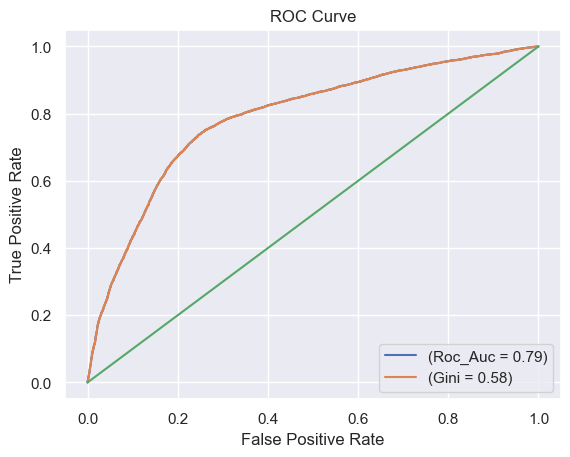

In [57]:
y_prob = clf.predict_proba(X_test)[:,1]

roc_auc = roc_auc_score(y_test, y_prob)
gini = (2*roc_auc_score(y_test, y_prob))-1

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot(fpr, tpr, label='(Roc_Auc = %0.2f)' % roc_auc)
plt.plot(fpr, tpr, label='(Gini = %0.2f)' % gini)
plt.plot([0, 1], [0, 1])
plt.xlim()
plt.ylim()

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

plt.legend(loc='lower right')
plt.show()

# Deployment

In [58]:
# If Gini score is higher than 40 percent then deploy the model for the new data



In [59]:
test = pd.read_excel(r'C:\Users\admin\OneDrive\Desktop\Machine Learning ders\data.xlsx')
test

,CustomerID,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe
0,CUS0x7c21,-1.094846,0.039621,-1.223150,0.015442,-0.489969,0.034597,-0.001817,-0.472545,-0.315796
1,CUS0xbaf4,-0.100916,-0.248829,1.209568,-0.124014,0.683625,0.116226,0.004571,-0.472545,0.182672
2,CUS0xd51,1.050763,0.095608,-0.352109,-0.124014,0.214456,0.033493,-0.017560,0.973760,0.182672
3,CUS0x5d82,0.496847,0.095608,1.209568,0.015442,-0.237030,-0.080783,-0.001817,0.973760,0.087011
4,CUS0x5c28,-0.100916,-0.248829,1.209568,0.015442,-0.237030,0.033493,0.021323,-0.472545,-0.315796
...,...,...,...,...,...,...,...,...,...,...
195,CUS0x9885,1.050763,0.095608,-0.352109,0.015442,0.683625,-0.080783,-0.019930,-0.010961,0.391003
196,CUS0xb78e,-0.100916,0.039621,1.209568,-0.124014,0.214456,-0.080783,-0.030392,-0.472545,-0.003414
197,CUS0xc620,-1.094846,0.131787,-0.352109,0.015442,-0.489969,0.087417,-0.017560,-0.472545,0.057730
198,CUS0xbaa9,0.496847,0.131787,1.271917,0.347071,0.683625,-0.059749,0.013036,-0.472545,0.391003


In [60]:
test.drop('CustomerID', axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( test_size=0.3, random_state=42)

In [61]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [62]:
y_prob = clf.predict_proba(test)[:,1]

In [63]:
test['PD']= y_prob

In [64]:
test

,Delayfromduedate_woe,ChangedCreditLimit_woe,OutstandingDebt_woe,Amountinvestedmonthly_woe,MonthlyBalance_woe,Occupation_woe,Month_woe,PaymentofMinAmount_woe,PaymentBehaviour_woe,PD
0,-1.094846,0.039621,-1.223150,0.015442,-0.489969,0.034597,-0.001817,-0.472545,-0.315796,0.746325
1,-0.100916,-0.248829,1.209568,-0.124014,0.683625,0.116226,0.004571,-0.472545,0.182672,0.080516
2,1.050763,0.095608,-0.352109,-0.124014,0.214456,0.033493,-0.017560,0.973760,0.182672,0.224538
3,0.496847,0.095608,1.209568,0.015442,-0.237030,-0.080783,-0.001817,0.973760,0.087011,0.101115
4,-0.100916,-0.248829,1.209568,0.015442,-0.237030,0.033493,0.021323,-0.472545,-0.315796,0.110990
...,...,...,...,...,...,...,...,...,...,...
195,1.050763,0.095608,-0.352109,0.015442,0.683625,-0.080783,-0.019930,-0.010961,0.391003,0.243946
196,-0.100916,0.039621,1.209568,-0.124014,0.214456,-0.080783,-0.030392,-0.472545,-0.003414,0.179743
197,-1.094846,0.131787,-0.352109,0.015442,-0.489969,0.087417,-0.017560,-0.472545,0.057730,0.556143
198,0.496847,0.131787,1.271917,0.347071,0.683625,-0.059749,0.013036,-0.472545,0.391003,0.099094
